# Analyzing 911 calls in Montgomery County, Pennsylvania, USA beginning from December 2015 to present.

# Analysis-3

In [2]:
#importing necessary libraries for analysis
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
plt.style.use('seaborn-colorblind')

In [3]:
#loading data into dataframe using pandas
df = pd.read_csv('../data/911.csv')

In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


# Top 20 zip codes that received most number of emergency 911 calls 

In [5]:
#finding the zip codes with highest number of emergency calls.
zip_count = df.groupby('zip').size().reset_index(name = "count").sort_values(['count'], ascending=False)
labels = zip_count.zip.apply(int).apply(str)[:20]
top_20 = zip_count['count'][:20]
index = np.arange(len(labels))

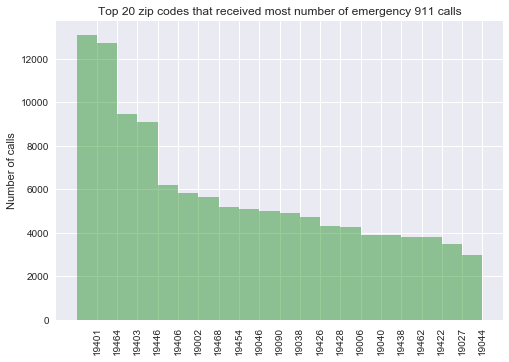

In [7]:
bar_width = 1.0
plt.bar(index, top_20, bar_width, color='green', alpha=0.4)
plt.xticks(index + (bar_width / 2.0), labels, rotation=90) # labels get centered
plt.title('Top 20 zip codes that received most number of emergency 911 calls')
plt.ylabel('Number of calls')
plt.show()

# Most calls received for Medical Emergency 

In [50]:
# category column added
df['category'] = df['title'].str.split(':').str.get(0)

In [51]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,category
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [52]:
cat_info = df.groupby('category').size().reset_index(name = "call_count")
cat_info

,category,call_count
0,EMS,94045
1,Fire,28104
2,Traffic,66602


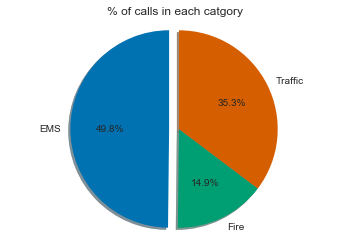

In [67]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = cat_info.category
sizes = cat_info.call_count
explode = (0.1, 0, 0)  # only "explode" 1st the slice which is 'EMS' i.e,split the slice
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('% of calls in each catgory')

plt.show()

# Call frequency in a day
#### Most number of calls are received in between 15th-17th Hrs of the day

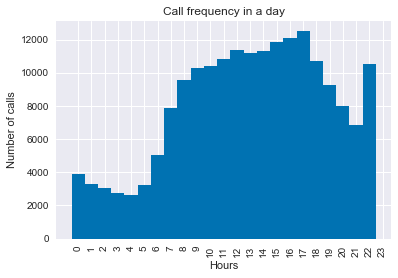

In [54]:
call_freq = df.timeStamp.apply(lambda s: datetime.datetime.strptime(s, "%Y-%m-%d %H:%M:%S").hour)
plt.hist(call_freq,bins=23)
positions = np.arange(24) + (bar_width / 2.0)
plt.xticks(positions , range(24), rotation=90)
plt.title('Call frequency in a day')
plt.xlabel('Hours')
plt.ylabel('Number of calls')
plt.show()

# Call Count for all categories in the last three months

In [55]:
#changing timeStamp string to datetime format
import datetime
df['timeStamp'] = df.timeStamp.apply(lambda s: datetime.datetime.strptime(s, "%Y-%m-%d %H:%M:%S"))

In [56]:
jan2017 = df[(df.timeStamp > datetime.datetime(2016, 12, 31)) &  (df.timeStamp <= datetime.datetime(2017, 1, 31))]
feb2017 = df[(df.timeStamp > datetime.datetime(2017, 1, 31)) &  (df.timeStamp <= datetime.datetime(2017, 2, 28))]
march2017 = df[(df.timeStamp > datetime.datetime(2017, 2, 28)) &  (df.timeStamp <= datetime.datetime(2017, 3, 31))]
jan2017 = jan2017.groupby('category').size().reset_index(name = "count")
feb2017 = feb2017.groupby('category').size().reset_index(name = "count")
march2017 = march2017.groupby('category').size().reset_index(name = "count")

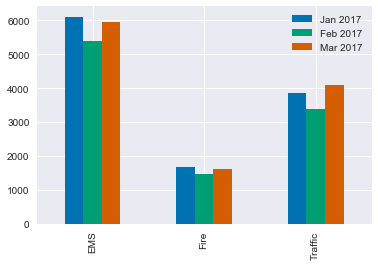

In [58]:
df = pd.DataFrame(index=jan2017['category'].values)
df['Jan 2017'] = jan2017['count'].values
df['Feb 2017'] = feb2017['count'].values
df['Mar 2017'] = march2017['count'].values

df.plot.bar()